# Styling Plotly Charts Reading

In [52]:
products = ['Macbook Pro Laptop', 'iPhone', 'ThinkPad Laptop', 'Google Phone', '27in 4K Gaming Monitor', '34in Ultrawide Monitor', 'Apple Airpods Headphones', 'Flatscreen TV', 'Bose SoundSport Headphones', '27in FHD Monitor']
sales = [8037600.0, 4794300.0, 4129958.7, 3319200.0, 2435097.56, 2355558.01, 2349150.0, 1445700.0, 1345565.43, 1132424.5]

### Item comparison

Ok, now let's see how we use our data visualization techniques to style our graphs in plotly.  With our initial example, really we are performing an item comparison.  As we know, we typically want this data displayed horizontally.

So let's start with some product data.

In [65]:
products = ['Macbook Pro Laptop', 'iPhone', 'ThinkPad Laptop', 'Google Phone', '27in 4K Gaming Monitor']
sales = [8037600.0, 4794300.0, 4129958.7, 3319200.0, 2435097.56]

To accomplish this, we just specify `orientation = h`, and reverse the order of our lists, so that the largest sale item (the mac book pro) is on top.

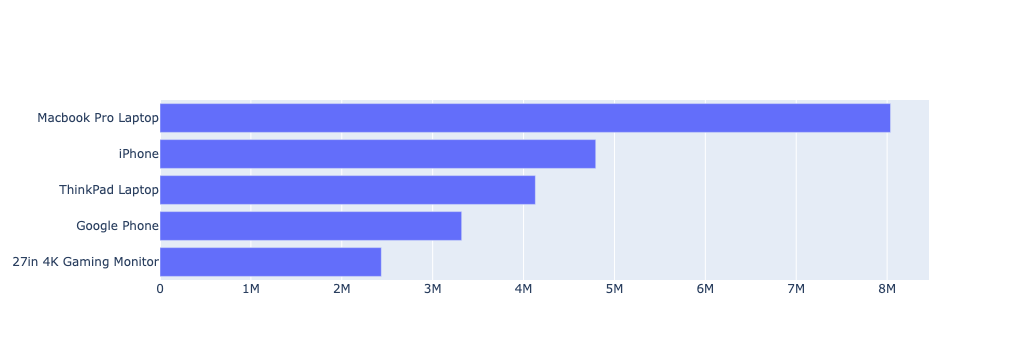

In [127]:
bar = go.Bar(y = products[::-1], x = sales[::-1], orientation='h')
fig_2 = go.Figure(data = [bar])
fig_2

Now we want to come up with a message for the data.  Here's one.

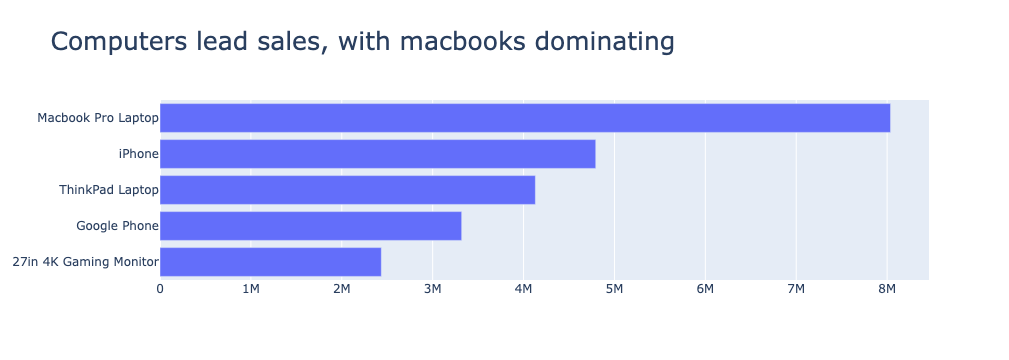

In [160]:

bar = go.Bar(y = products[::-1], x = sales[::-1], orientation='h')
title = '<span style="font-size: 25px;">Computers lead sales, with macbooks dominating</span>'
fig_2 = go.Figure(data = [bar], labyout = go.Layout(title = title))
fig_2

> Notice we can just pass html into our title, and plotly interprets it.

Ok, the next step is to then to have that message emphasized by the plot.  

At this point, a good step may be to just draw out the ideal with pencil and paper, and then we can work to match it in plotly.  For our item charts, remember that we like to call out the relevant categories with a different color.  And we also may want numbers to emphasize our point.

So let's add some colors to highlight macbook sales vs thinkpad sales.

In [161]:
colors = ['#609cd4']*len(products)
colors[2] = '#ec7c34'
colors[-1] = '#FFCE56'

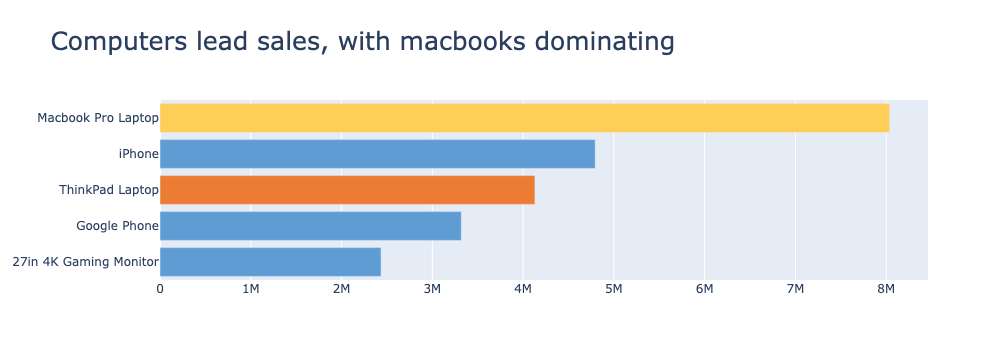

In [179]:
bar = go.Bar(y = products[::-1], x = sales[::-1], orientation='h', 
             marker_color = colors)
title = '<span style="font-size: 25px;">Computers lead sales, with macbooks dominating</span>'
fig_2 = go.Figure(data = [bar], layout = go.Layout(title = title))
fig_2

And macbook sales are really a lot more than thinkpad.

In [ ]:
sales = [8037600.0, 4794300.0, 4129958.7, 3319200.0, 2435097.56]

But we can emphasize that even more if we change our data to millions -- and add the correct amount of decimals.

In [176]:
sales_millions = [round(sale/1_000_000, 1) for sale in sales]
sales_millions # [8.0, 4.8, 4.1, 3.3, 2.4]


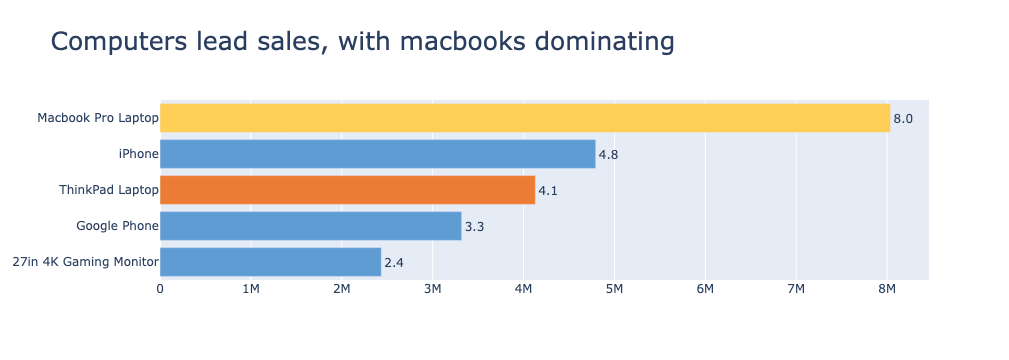

In [183]:
bar = go.Bar(y = products[::-1], x = sales[::-1], orientation='h', 
             marker_color = colors, text = sales_millions[::-1], textposition = 'outside')
title = '<span style="font-size: 25px;">Computers lead sales, with macbooks dominating</span>'
fig_2 = go.Figure(data = [bar], layout = go.Layout(title = title))
fig_2

And remember that if we are labeling the data, we do not need the axis labels, describing the same thing.  This means that we should change the figure's layout.

> You can explore arguments to pass into the Xaxis by looking at the corresponding XAxis class.

In [199]:
go.layout.XAxis()

Ok, now let's work on our new figure.

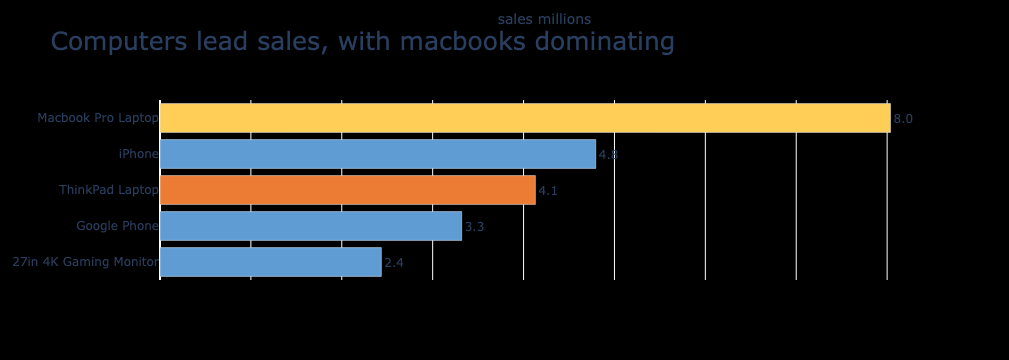

In [221]:
title = '<span style="font-size: 25px;">Computers lead sales, with macbooks dominating</span>'

layout = go.Layout(title = title, 
                   xaxis = {'title': 'sales millions', 'showticklabels': False}, 
                   paper_bgcolor = 'rgb(0, 0, 0, 0)',
                   plot_bgcolor='rgba(0,0,0,0)')


bar = go.Bar(y = products[::-1], x = sales[::-1], orientation='h', 
             marker_color = colors, text = sales_millions[::-1], textposition = 'outside')



fig_2 = go.Figure(data = [bar], layout = layout)
fig_2

The only issue with the above is that our xaxis title is in the wrong spot (at the top).  This is because for whatever reason, the `showticklabels`, which removes our tick labels on the bottom axis, is affecting the position of the axis text.  So instead, let's remove the axis text and use an annotation instead.

> Once again, we can explore the annotation object with something like the following.

In [231]:
go.layout.Annotation()

layout.Annotation()

And then we can add the annotation to the **layout** (not the figure) by passing it into the `annotations` argument.

> Notice with the anmotation, we specify the text and the x and y values.  Our x value is quite large because our x axis is in millions -- so even to budge our text a bit to the right, we need to move it over by 800_000.

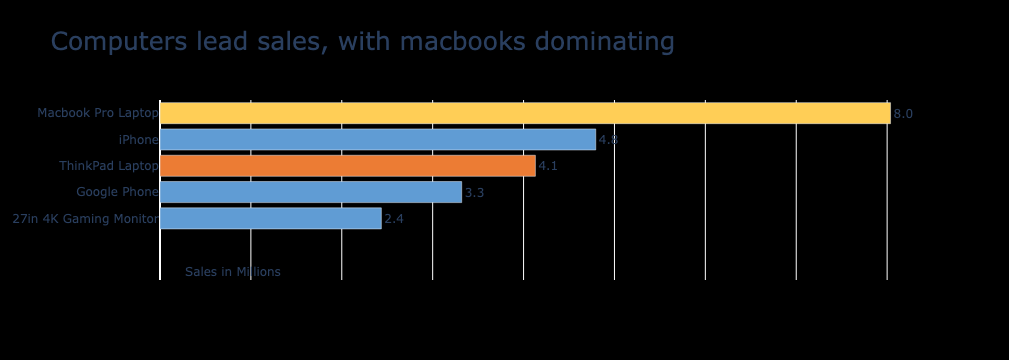

In [311]:
title = '<span style="font-size: 25px;">Computers lead sales, with macbooks dominating</span>'

axis_annotation = go.layout.Annotation(text = 'Sales in Millions',  y = -2,  x=800_000, showarrow=False)


layout = go.Layout(title = title, 
                   xaxis = {'showticklabels': False},
                   paper_bgcolor = 'rgb(0, 0, 0, 0)',
                   plot_bgcolor='rgba(0,0,0,0)', annotations = [axis_annotation])
                                
bar = go.Bar(y = products[::-1], x = sales[::-1], orientation='h', 
             marker_color = colors, text = sales_millions[::-1], textposition = 'outside')


fig_2 = go.Figure(data = [bar], layout = layout)
fig_2

Let's continue working with annotations.  We'll add more text to highlight the difference between thinkpad and macbook sales.  


Let's add some text right below Thinkpad bar, to highlight the difference in sales from a Macbook. For our annotation, we can base the `x` position right near the thinkpad sales value of -- 4.1 million.

Then we add a line -- where we indicate the starting and ending x values (x0 and x1) and starting and ending y values (y0 and y1).  The `x0` is based around around the thinkpad value, and ending value of x1 is based around the Macbook value of 8 million.  

In [314]:
go.layout.Shape()

layout.Shape()

In [316]:
go.layout.shape.Line()

layout.shape.Line()

In [377]:
x_start = 4_600_000
x_end = 8_000_000
y_start = 2
y_end = 2

arrow = go.layout.Annotation(
                x= x_end,
                y= y_end,
                xref="x", yref="y",
                showarrow=True,
                yanchor="top",
                axref = "x", ayref='y',
                ax= x_start,
                ay= y_start,
                arrowhead = 3,
                arrowwidth=1.5,
                arrowcolor='gray')

text = go.layout.Annotation(
                x= x_start + 1_000_000,
                y= y_start - .4, text="3.9m fewer sales than mac",
                xref="x", yref="y", showarrow=False,
                arrowcolor='gray')

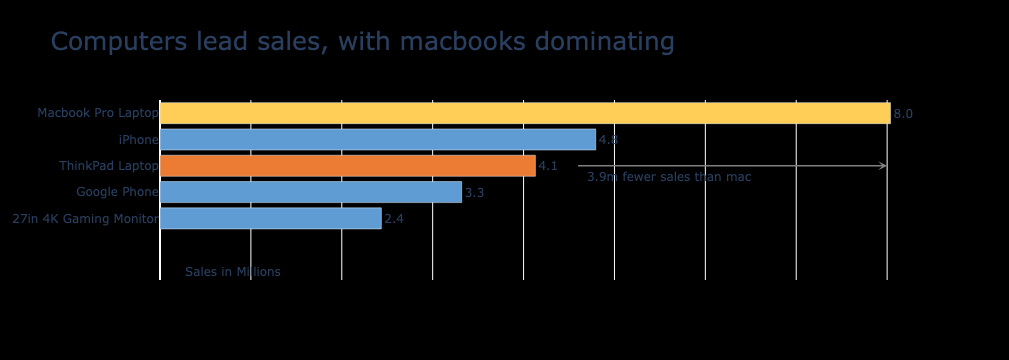

In [378]:
title = '<span style="font-size: 25px;">Computers lead sales, with macbooks dominating</span>'

axis_annotation = go.layout.Annotation(text = 'Sales in Millions',  y = -2,  x=800_000, showarrow=False)


# Add line to shapes argument, and also have both annotations
layout = go.Layout(title = title, 
                   xaxis = {'showticklabels': False}, annotations = [axis_annotation, arrow, text],
                   paper_bgcolor = 'rgb(0, 0, 0, 0)',
                   plot_bgcolor='rgba(0,0,0,0)')
                                
bar = go.Bar(y = products[::-1], x = sales[::-1], orientation='h', 
             marker_color = colors, text = sales_millions[::-1], textposition = 'outside')


fig_2 = go.Figure(data = [bar], layout = layout)
fig_2

### Column Chart

If using the column chart, the same styling rules apply.  Use a contrasting shade to emphasize the most important item.   And use numbers at the end the bars, omitting decimals.

As mentioned, we prefer horizontal charts to column charts.  However, column charts can be used when there is a real sequence between the categories -- for example revenue per year. 

### Time Comparisons - Line Chart

The last chart is the line chart -- which is for showing changes in data over time.

<img src="./classic-line-chart.png" width="40%">

The chart above is properly styled.  Notice that we are showing the difference between the past data and the projected data (although that projection looks optimistic).  And that we are doing so both with the shading and the dashed line.

Below is another line chart -- which shows the revenue of one company -- Company A -- against each of the competitors.  Beccause it's difficult to keep track of all of that information, underneath the chart is broken into smaller components -- with each competitor given a separate breakout chart (or you could just break out the most interesting of the competitors).  

<img src="./spaghetti.png" width="40%">

<img src="./untangled.png" width="40%">

### Summary

In this lesson, we saw how to display our different kinds of comparisons.  There were a couple of takeaways:
    
* Don't use pie charts -- even when working with percentages.  
* Most often, you can stick with horizontal bar charts, which make it easy to compare groups, and also provide for labeling.
    * Just remember to be careful about how you choose those groups
* A column chart is ok when the data is sequential (as in revenue per year)
* And a line chart is typically used for showing change over time
  

### Resources

[Sales Sample Data](https://www.kaggle.com/datasets/kyanyoga/sample-sales-data)

[Supermarket Sales](https://www.kaggle.com/datasets/aungpyaeap/supermarket-sales)

[Plotly Shapes](https://plotly.com/python/horizontal-vertical-shapes/)

[Plotly Annotations](https://plotly.com/python/text-and-annotations/)